## 1. Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from io import StringIO
from sklearn.tree import export_graphviz 
import pydotplus
import matplotlib.image as mpimg 

## 2. Importing data

In [2]:
df= pd.read_csv('Company_Data (1).csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## 3. Understanding data

In [3]:
print('No. of observations:{}\nNo. of features:{}'.format(df.shape[0],df.shape[1]))

No. of observations:400
No. of features:11


In [4]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
df.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


### >  Outlier check

<AxesSubplot:xlabel='Sales'>

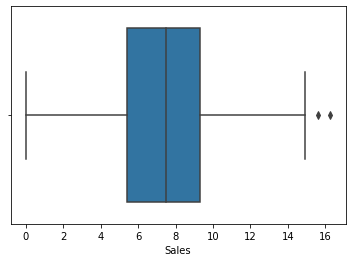

In [7]:
sns.boxplot(df['Sales'])

#### >>>The data has 2 outlier instances

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


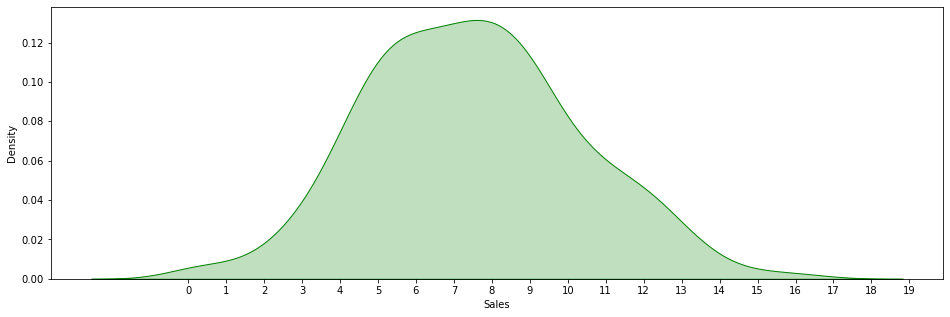

In [8]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Sales'].skew()))
print("Kurtosis: {}".format(df['Sales'].kurtosis()))
ax = sns.kdeplot(df['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

#### >>> Data is Skewed on the right
#### >>> Data has negative Kurtosis

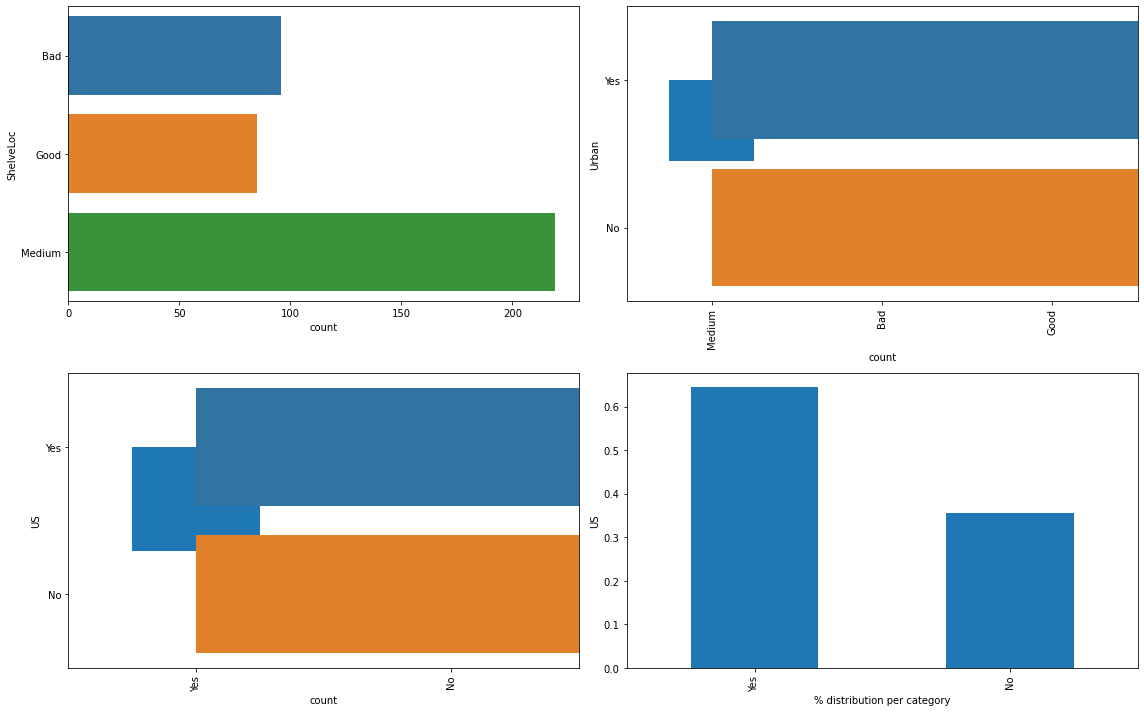

In [9]:
obj_colum= df.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col)
    plt.subplot(2,2,i+1)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

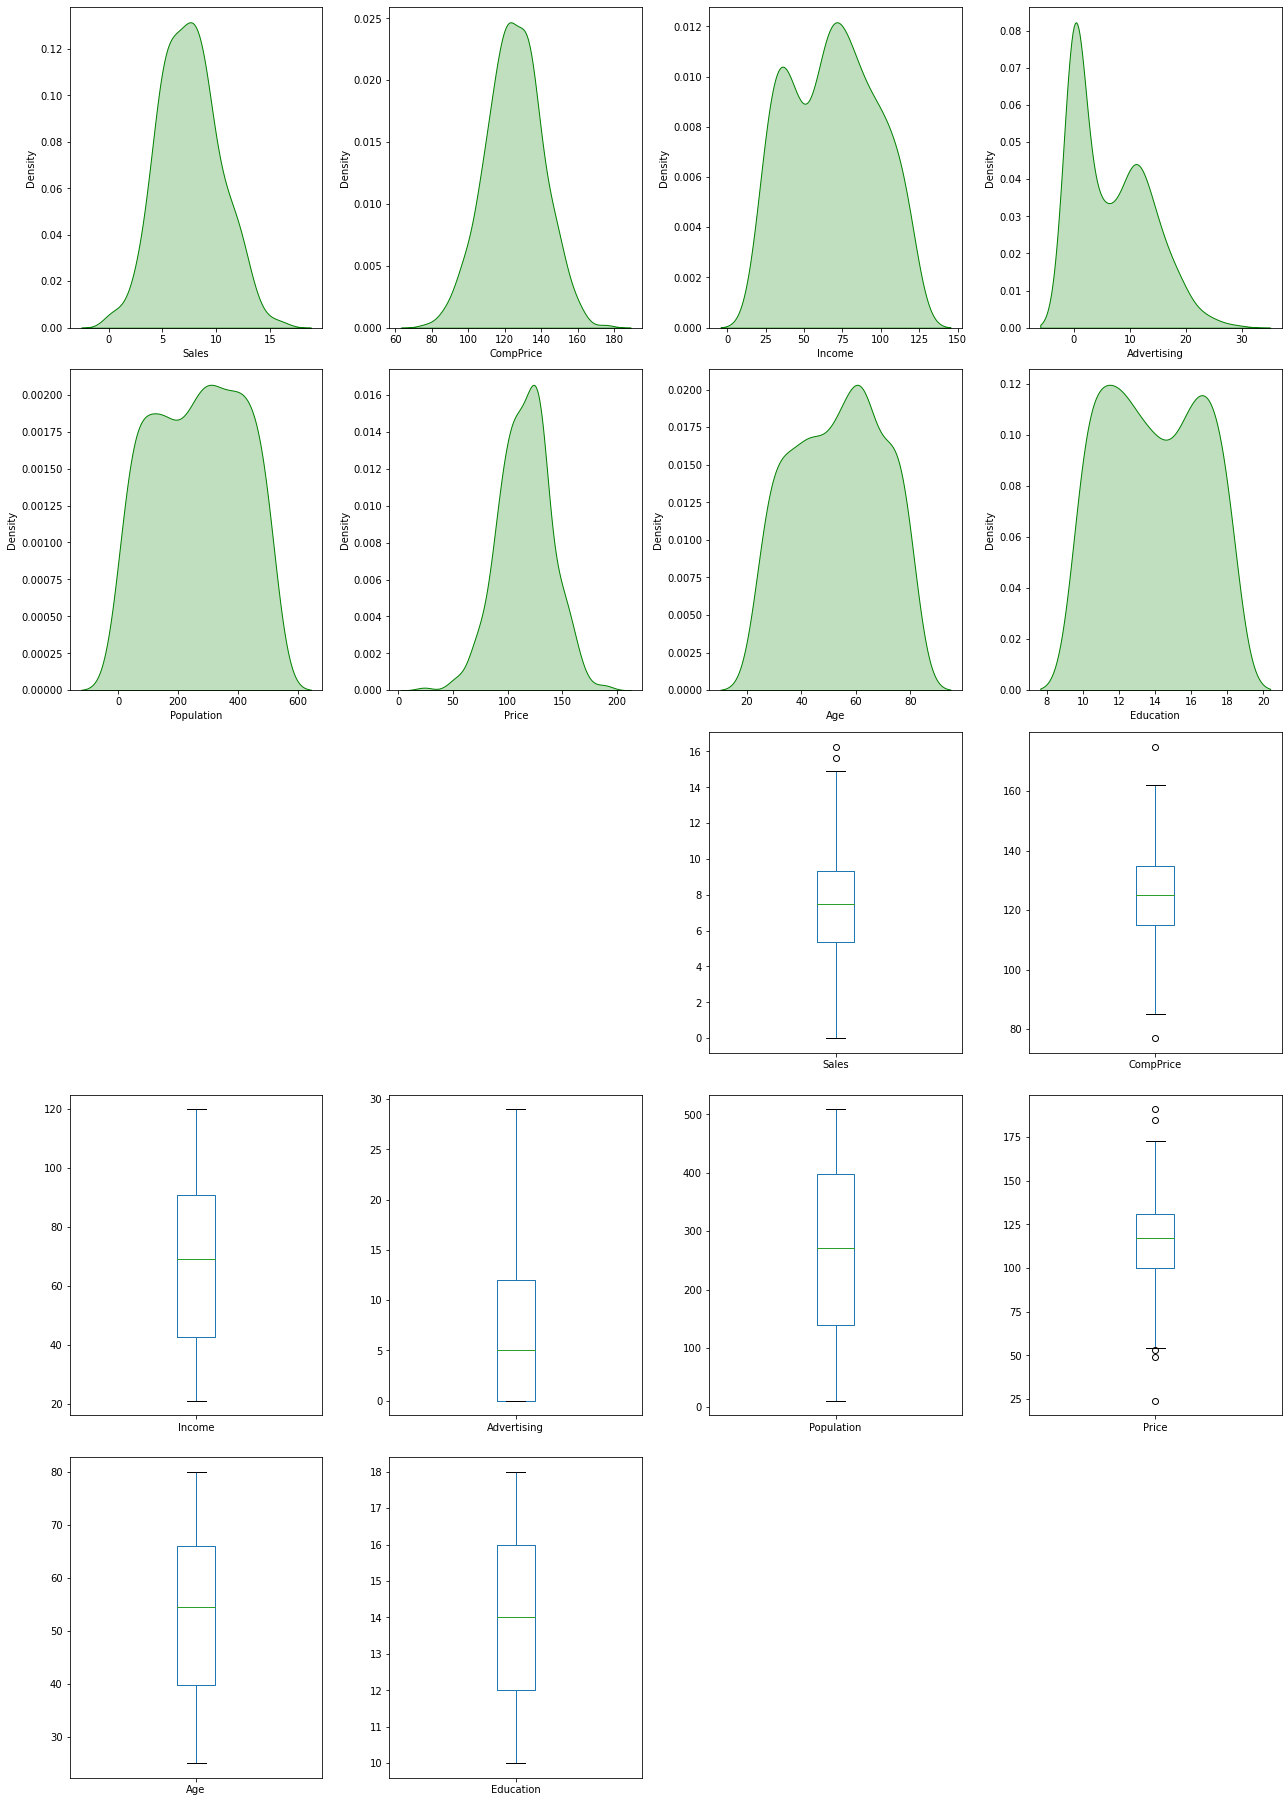

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [10]:
num_columns= df.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [11]:
df1= df.copy()
df1= pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [12]:
corr= df1.corr()

<AxesSubplot:>

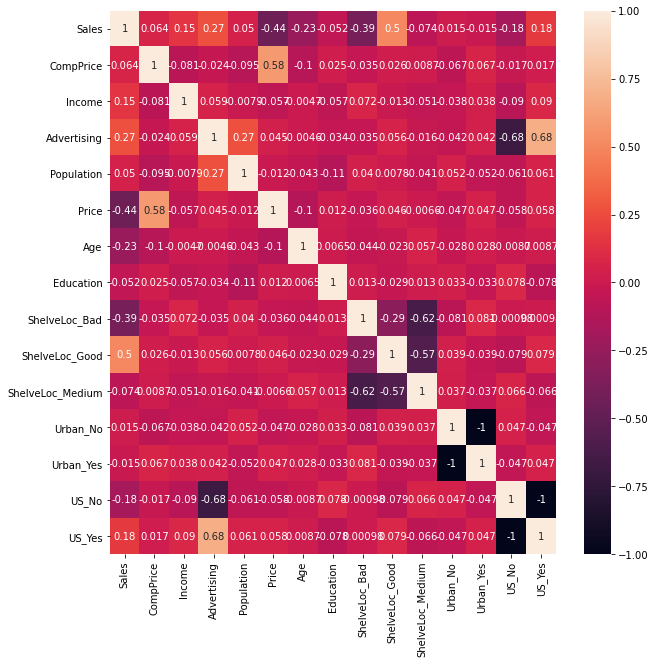

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

## 4. Model Building|| Model testing
Since the target variable is continious, we create a class of the value based on the mean
<= 7.49 == "Small" and > 7.49 == "large"

In [14]:
df1["sales"]= "small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis= 1,inplace= True)

In [15]:
x= df1.iloc[:,0:14]
y= df1.iloc[:,14]

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [17]:
y_train.value_counts()

large    164
small    156
Name: sales, dtype: int64

In [18]:
model= RandomForestClassifier(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, n_jobs=4,
                       oob_score=True)

In [19]:
model.oob_score_

0.8125

In [20]:
pred_train= model.predict(x_train)

In [21]:
accuracy_score(y_train,pred_train)

1.0

In [22]:
confusion_matrix(y_train,pred_train)

array([[164,   0],
       [  0, 156]], dtype=int64)

In [23]:
pred_test= model.predict(x_test)

In [24]:
accuracy_score(y_test,pred_test)

0.8

In [33]:
confusion_matrix(y_test,pred_test)

array([[28,  7],
       [ 9, 36]], dtype=int64)

In [37]:
cols= list(df1.columns)
predictors= cols[0:14]
target= cols[14]
tree1= model.estimators_[20]

In [38]:
dot_data = StringIO()

In [39]:
export_graphviz(tree1, out_file= dot_data, feature_names=predictors, class_names= target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)

In [40]:
graph= pydotplus.graph_from_dot_data(dot_data.getvalue())

In [41]:
graph.write_png('company_full.png')

True

## 4 - Conclusion
Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 76%
As seen in the confusion matrix of Test data 61 instances are presdected correctly and 19 instances are not

In [43]:
rf_small= RandomForestClassifier(n_estimators=10, max_depth = 3)

In [44]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [45]:
tree_small= rf_small.estimators_[5]

In [46]:
export_graphviz(tree_small, out_file= dot_data, feature_names= predictors, rounded= True, precision= 1)

In [47]:
graph_small= pydotplus.graph_from_dot_data(dot_data.getvalue())

In [48]:
graph.write_png('company_full.png')

True

In [49]:
graph.write_png('company_small.png')

True

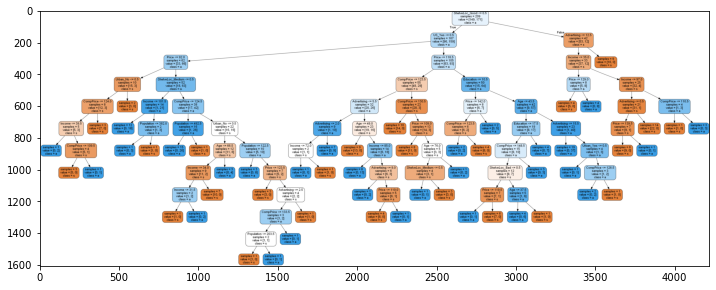

In [54]:
plt.figure(figsize=(12,12))
img= mpimg.imread('company_small.png') 
plt.imshow(img)

In [51]:
model.feature_importances_

array([0.1026113 , 0.09954272, 0.09441965, 0.09707791, 0.21988074,
       0.12796337, 0.05735033, 0.05162978, 0.07837094, 0.02481294,
       0.00976908, 0.01207715, 0.01052145, 0.01397263])

In [52]:
fi= pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
4,Price,0.219881
5,Age,0.127963
0,CompPrice,0.102611
1,Income,0.099543
3,Population,0.097078
2,Advertising,0.094420
8,ShelveLoc_Good,0.078371
6,Education,0.057350
7,ShelveLoc_Bad,0.051630
9,ShelveLoc_Medium,0.024813


#### >>>>As seen in the above table Price is most important feature